In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
#import important libraries
import pandas as pd
import numpy as np

In [3]:
#Load Iris data
Iris = pd.read_csv("iris.csv")

In [4]:
#Generate 10 random integers in the range of 0 to number of rows & display those rows using iloc
Iris.iloc[np.random.randint(0,Iris.shape[0],10)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
110,111,6.5,3.2,5.1,2.0,Iris-virginica
116,117,6.5,3.0,5.5,1.8,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
115,116,6.4,3.2,5.3,2.3,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Check if there are any missing values

In [5]:
#Create a temporary variable that stores if a given cell is Null or not
mv = Iris.isnull()

#Iterate through each columns
for i in mv.columns:
    #Initialize flag as False initially for each column
    b = False
    
    #Iterate through each rows
    for j in range(mv.shape[0]):
        
        #If we find a True for Null value
        if mv.loc[j,i] == True:
            #Set flag as True & exit For loop
            b = True
            break

    #Print results for each column based on Flag value
    if b:
        print("Column", i, "has some missing values.")
    else:
        print("Column", i, "has no missing values.")
        
#Delete temporary variables
del mv, b, i, j

Column Id has no missing values.
Column SepalLengthCm has some missing values.
Column SepalWidthCm has some missing values.
Column PetalLengthCm has some missing values.
Column PetalWidthCm has some missing values.
Column Species has no missing values.


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
#Import library for preprocessing from Scikit learn
from sklearn import preprocessing

In [7]:
#Get the Label encoder
le = preprocessing.LabelEncoder()

#Convert Species column to encoded values of class of Iris
Iris.Species=le.fit_transform(Iris.Species)

#View transformed Data
print("After transforming Categorical data to numerical data, we have:")
Iris

After transforming Categorical data to numerical data, we have:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [8]:
#Find correlation between each independent variable and Target variable
c = Iris.corr().iloc[0:-1,-1]

#Print the correlation between each independent variable and Target variable
print("Correlation of following Independent variables with Target variable", Iris.columns[-1], "is as below:\n",c)

#Start the range from backwards so that index of uniterated columns doesn't change on some columns getting dropped
for i in range(c.shape[0] - 1, -1, -1):
    #Check if correlation is in range -0.1 to 0.1
    if c[i] >= -0.1 and c[i] <= 0.1:
        #Drop that column
        Iris.drop(columns=Iris.columns[i], axis=1, inplace=True)

#Print the resultant Dataset after dropping Columns
print("\nAfter dropping variables having correlation in range -0.1 to 0.1, we have:\n", Iris)

#Delete temporary variables
del c, i

Correlation of following Independent variables with Target variable Species is as below:
 Id               0.942753
SepalLengthCm    0.779245
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956152
Name: Species, dtype: float64

After dropping variables having correlation in range -0.1 to 0.1, we have:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
5      6            5.4           3.9            1.7           0.4        0
6      7            4.6           3.4            1.4           0.3        0
7      8            5.0           3.4            1.5           0.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [9]:
#Find variance of all independent variables
v = Iris.var().iloc[0:-1]

#Print the variane of all independent variables
print("Variance of Independent variables is as below:\n",v)

#Start the range from backwards so that index of uniterated columns doesn't change on some columns getting dropped
for i in range(v.shape[0] - 1, -1, -1):
    #Check if variance < 0.1
    if v[i] <= 0.1:
        #Drop that column
        Iris.drop(columns=Iris.columns[i], axis=1, inplace=True)

#Print the resultant Dataset after dropping Columns
print("\nAfter dropping variables having variance < 0.1, we have:\n", Iris)

#Delete temporary variables
del v, i

Variance of Independent variables is as below:
 Id               1938.000000
SepalLengthCm       0.681143
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.580926
dtype: float64

After dropping variables having variance < 0.1, we have:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
5      6            5.4           3.9            1.7           0.4        0
6      7            4.6           3.4            1.4           0.3        0
7      8            5.0           3.4            1.5           0.2        0
8      9            4.4           2.9            

## Question 6

*Plot the scatter matrix for all the variables.*

In [10]:
#Import Seaborn library to plot Pairplot
import seaborn as sns

#Drop null values so that Pairplot works well
Iris.dropna(inplace = True)

#Plot Pairplot disgram of all the variables
sns.pairplot(Iris, markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Iris.iloc[:,0:-1], Iris.iloc[:,-1], test_size=0.2) # 80% training and 20% test

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

for k in [3,5,9]:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)

    #Model Accuracy, how often is the classifier correct?
    print("Accuracy with k =", k, "is:", metrics.accuracy_score(y_test, y_pred))
    
#Delete temporary variable
del k

Accuracy with k = 3 is: 1.0
Accuracy with k = 5 is: 1.0
Accuracy with k = 9 is: 0.8666666666666667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [13]:
minimum = 1
min_k = 0
mse = []
for k in range(1, 20, 2):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)

    #Misclassification error
    mse.append(1 - metrics.accuracy_score(y_test, y_pred))
    
    #Print the Misclassification error
    print("Misclassification Error with k =", k, " is:", mse[-1])
    
    if mse[-1] < minimum:
        minimum = mse[-1]
        min_k = k

#Print the model with minimum Misclassification Error
print("Model with minimum Misclassification Error of", minimum, "is with k = ", min_k, "neighbours.")

#Delete temporary variables
del minimum, min_k, k

Misclassification Error with k = 1  is: 0.0
Misclassification Error with k = 3  is: 0.0
Misclassification Error with k = 5  is: 0.0
Misclassification Error with k = 7  is: 0.09999999999999998
Misclassification Error with k = 9  is: 0.1333333333333333
Misclassification Error with k = 11  is: 0.1333333333333333
Misclassification Error with k = 13  is: 0.1333333333333333
Misclassification Error with k = 15  is: 0.1333333333333333
Misclassification Error with k = 17  is: 0.1333333333333333
Misclassification Error with k = 19  is: 0.1333333333333333
Model with minimum Misclassification Error of 0.0 is with k =  1 neighbours.


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

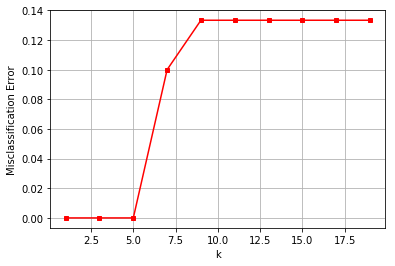

In [14]:
#Import Pyplot from Matplotlib
import matplotlib.pyplot as plt

#To show graph without specifically requiring to call show method
%matplotlib inline

#Define plot details
plt.plot(range(1, 20, 2), mse, color='r', marker='s', markersize = 4)
plt.xlabel('k')
plt.ylabel('Misclassification Error')
plt.grid()